#### Analysis of Monthly Sales Prediction

In [2]:
#Import all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#Create the historical sales data 
sales = {
    'Month': ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
            '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', 
            '2025-02', '2025-03', '2025-04', '2025-05', '2025-06', '2025-07'],
    'Sales': [125, 128, 124, 122, 123, 126, 123, 127, 124, 125, 125, 129, 128, 124, 128, 130, 128, 129, 130]
}

#Create a datagframe with the data 
df = pd.DataFrame(sales)
df['Month'] = pd.to_datetime(df['Month']) #Transform all de dates into datetime type
#df.set_index('Month', inplace=True) #select the month column as de index in the original df
df ['Index'] = np.arange(len(df))
df.set_index('Index', inplace=True)

df


,Month,Sales
Index,,
0,2024-01-01,125
1,2024-02-01,128
2,2024-03-01,124
3,2024-04-01,122
4,2024-05-01,123
5,2024-06-01,126
6,2024-07-01,123
7,2024-08-01,127
8,2024-09-01,124


In [4]:
#Prepare the data for the prediction
x = np.arange(len(df)).reshape(-1, 1) #the x will start on 0 to 18
y = df['Sales'].values

#Create and train de model por the Linear Regression
model_lr = LinearRegression()
model_lr.fit(x, y)

#Predict sales from August to December
x_pred = np.array([19, 20, 21, 22, 23]).reshape(-1, 1)
prediction = model_lr.predict(x_pred)

#Create the data with the prediction
pred_dates = pd.date_range(start='2025-08-01', periods=5, freq='MS')
df_pred = pd.DataFrame({'Month': pred_dates, 'Sales': np.round(prediction)})
df_pred['Index'] = np.arange(19, 19 + len(df_pred))
df_pred.set_index('Index', inplace=True)

#Merge real data + prediction
df_complete = pd.concat([df, df_pred])

#Show the new table
df_complete

,Month,Sales
Index,,
0,2024-01-01,125.0
1,2024-02-01,128.0
2,2024-03-01,124.0
3,2024-04-01,122.0
4,2024-05-01,123.0
5,2024-06-01,126.0
6,2024-07-01,123.0
7,2024-08-01,127.0
8,2024-09-01,124.0


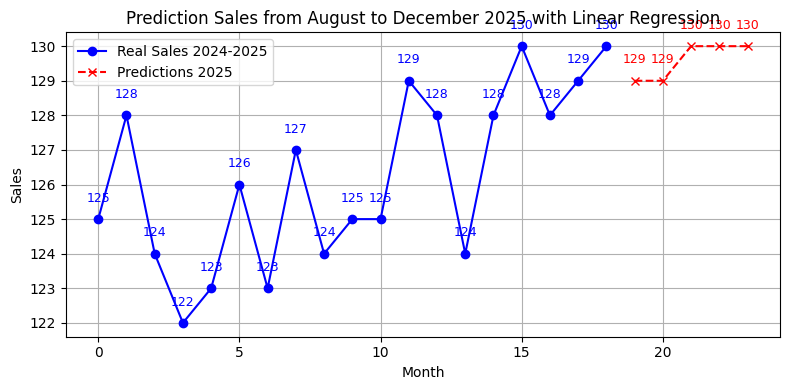

Linear Regression Predictions: 
Aug 2025: 129.00 sales
Sep 2025: 129.00 sales
Oct 2025: 130.00 sales
Nov 2025: 130.00 sales
Dec 2025: 130.00 sales


In [5]:
#Graph with labels the real sales and prediction sales
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Sales'], label='Real Sales 2024-2025', color='blue', marker='o')
for i in df.index:
    plt.text(i, df.loc[i, 'Sales'] + 0.5, str(round(df.loc[i, 'Sales'])), ha='center', fontsize=9, color='blue')

#Graph of prediction sales
plt.plot(df_pred.index, df_pred['Sales'], label='Predictions 2025', color='red', marker='x', linestyle='--')
for i in df_pred.index:
    plt.text(i, df_pred.loc[i, 'Sales'] + 0.5, str(round(df_pred.loc[i, 'Sales'])), ha='center', fontsize=9, color='red')

plt.title("Prediction Sales from August to December 2025 with Linear Regression")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Linear Regression Predictions: ")
for date, value in zip(df_pred['Month'].dt.strftime('%b %Y'), df_pred['Sales']):
    print(f"{date}: {value:.2f} sales")

In [6]:
#Export as CSV to work with POWER BI
df_complete.to_csv('Monthly_sales.csv', index=False)